In [2]:
from scipy import stats

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Importing experimental results

Reading the experimental results here, these depend on...
* The algorithm used to predict most influential node set (Greedy++, Page Rank, Degree, Random)
* The threshold used to determine when a node is turned active (linear, concave, convex, majority vote)
* The data set

The CSV files contain info on...

* `Size`: Size of seed set
* `Influence`: The predicted influence for a given setting, i.e. combination of values from the setting space defined above
* `Node Runtime`: Time required to calculate prediction for most influential vertex set
* `Inf Runtime`: Time required to calculate influence of given vertex set

### NetHEPT

In [3]:
df_greedy_nethept_linear = pd.read_csv("Greedy++_output_NetHept_linear/Influence.csv")
df_pagerank_nethept_linear = pd.read_csv("PageRank_output_NetHept_linear/Influence.csv")
df_degree_nethept_linear = pd.read_csv("Degree_output_NetHept_linear/Influence.csv")
df_random_nethept_linear = pd.read_csv("Random_output_NetHept_linear/Influence.csv")

In [7]:
df_greedy_nethept_convex = pd.read_csv("Greedy++_output_NetHept_convex/Influence.csv")
df_pagerank_nethept_convex = pd.read_csv("PageRank_output_NetHept_convex/Influence.csv")
df_degree_nethept_convex = pd.read_csv("Degree_output_NetHept_convex/Influence.csv")
df_random_nethept_convex = pd.read_csv("Random_output_NetHept_convex/Influence.csv")

In [9]:
df_degree_nethept_concave = pd.read_csv("Degree_output_NetHept_concave/Influence.csv")

In [16]:
df_greedy_nethept_majority = pd.read_csv("Greedy++_output_NetHept_majority/Influence.csv")
df_pagerank_nethept_majority = pd.read_csv("PageRank_output_NetHept_majority/Influence.csv")
df_degree_nethept_majority = pd.read_csv("Degree_output_NetHept_majority/Influence.csv")
df_random_nethept_majority = pd.read_csv("Random_output_NetHept_majority/Influence.csv")

### NetPhy

In [51]:
df_greedy_netphy = pd.read_csv("Greedy++_output_NetPhy_linear/Influence.csv")
df_pagerank_netphy = pd.read_csv("PageRank_output_NetPhy_linear/Influence.csv")
df_degree_netphy = pd.read_csv("Degree_output_NetPhy_linear/Influence.csv")
df_random_netphy = pd.read_csv("Random_output_NetPhy_linear/Influence.csv")

### Epinions

In [129]:
df_greedy_epinions = pd.read_csv("Greedy++_output_Epinions_linear/Influence.csv")
df_pagerank_epinions = pd.read_csv("PageRank_output_Epinions_linear/Influence.csv")
df_degree_epinions = pd.read_csv("Degree_output_Epinions_linear/Influence.csv")
df_random_epinions = pd.read_csv("Random_output_Epinions_linear/Influence.csv")

## Statistical tests

Attempting the following tests...

* **Mann Whitney U test**: To inspect effect of algorithm on influence, data obtained depend on seed set size and follow no normal distribution, therefore using a non-parametric test here. Furthermore, since each run of any given setting includes generation of random numbers we are using a non-paired test
* **Unpaired t-test**: For a given seed set size inspect effect of algorithm on influence over multiple runs (here obtained values are reasoned to be independent and normally distributed around some mean)
* **Comparison w/ original authors**: Probably also some test to compare our obtained values with those from the original authors...

### Comparing algorithms (various seed set sizes)

In [32]:
stats.mannwhitneyu(df_greedy_nethept[['Influence']], df_pagerank_nethept[['Influence']])

MannwhitneyuResult(statistic=199.5, pvalue=0.30301264010261997)

In [81]:
stats.mannwhitneyu(df_greedy_nethept[['Influence']], df_degree_nethept[['Influence']])

MannwhitneyuResult(statistic=181.0, pvalue=0.16325855660250066)

In [34]:
stats.mannwhitneyu(df_greedy_nethept[['Influence']], df_random_nethept[['Influence']])

MannwhitneyuResult(statistic=29.5, pvalue=8.217521574816841e-07)

### Comparing algorithms (same seed set size, multiple runs)

In [127]:
infl_random = []
infl_degree = []
infl_pagerank = []

for i in range(40):
    infl_random.append(pd.read_csv(f"Random_output_NetHept_linear_iter{i}/Influence.csv").Influence[0])
    infl_degree.append(pd.read_csv(f"Degree_output_NetHept_linear_iter{i}/Influence.csv").Influence[0])
    infl_pagerank.append(pd.read_csv(f"PageRank_output_NetHept_linear_iter{i}/Influence.csv").Influence[0])

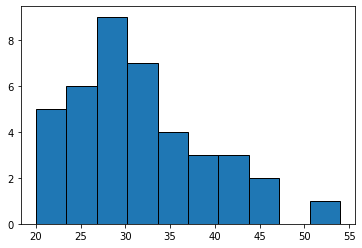

In [121]:
plt.hist(runtimes_random, edgecolor='black')
plt.show()

In [122]:
stat, p = stats.shapiro(runtimes_random)

if p > 0.05:
    print("Random influences: Normally distributed")
else:
    print("Random influences: Not(!) normally distributed")

Random influences: Normally distributed


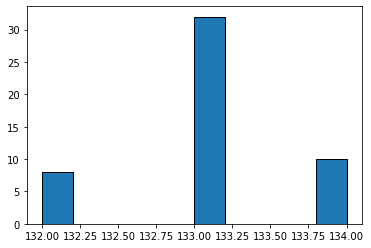

In [124]:
plt.hist(infl_pagerank, edgecolor='black')
plt.show()

In [125]:
stat, p = stats.shapiro(infl_pagerank)

if p > 0.05:
    print("PageRank influences: Normally distributed")
else:
    print("PageRank influences: Not(!) normally distributed")

PageRank influences: Not(!) normally distributed


In [128]:
stats.ttest_ind(infl_pagerank, infl_degree)

Ttest_indResult(statistic=903.2004244895463, pvalue=1.5610930801930885e-158)

## Visualization

* Visualizing effect of algorithm on influence for given data sets
* Visualizing run time of determining the prediction for most influencial node set for given data set, algorithm (threshold: linear)

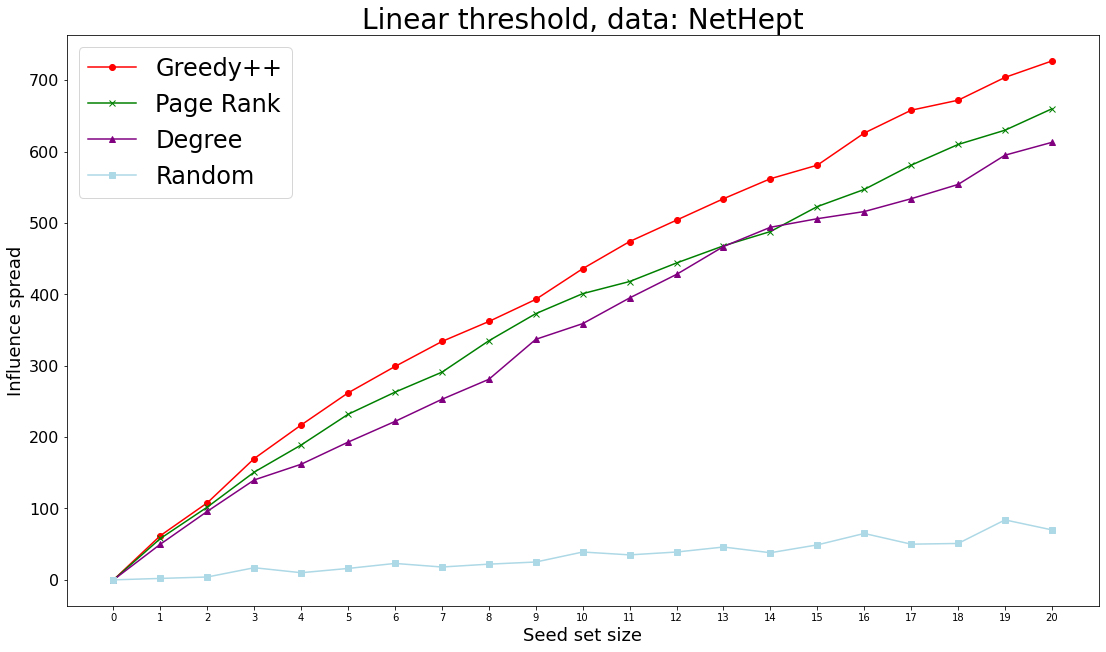

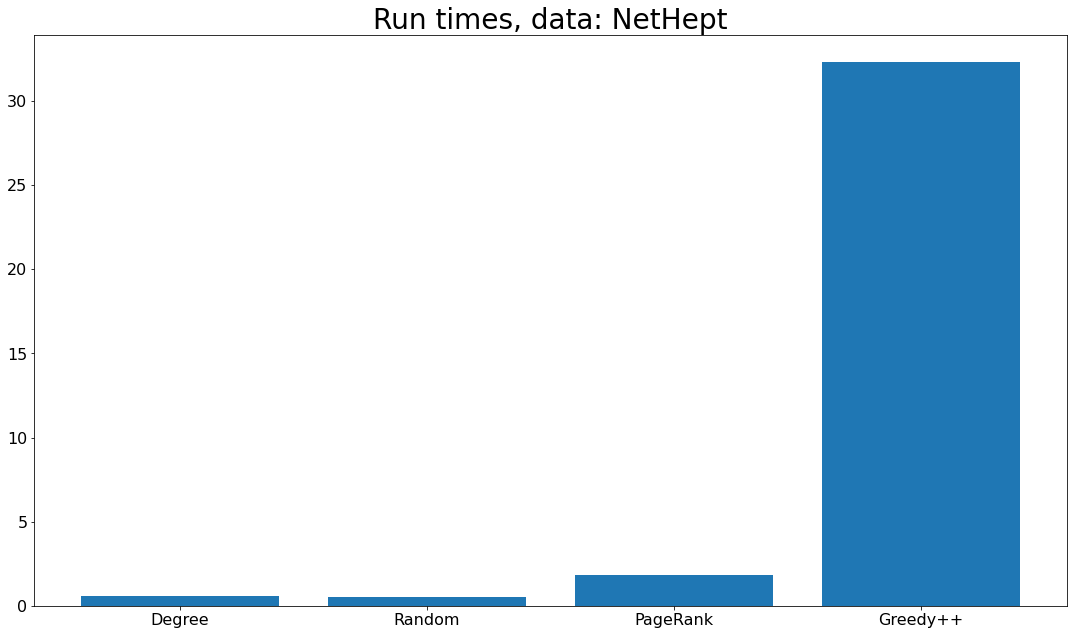

In [5]:
def plot_inf(data, df_greedy, df_pagerank, df_degree, df_random, threshold):
    plt.title(f"{threshold} threshold, data: {data}", fontsize=28)
    plt.plot(df_greedy.Size, df_greedy.Influence, marker="o", color="red", )
    plt.plot(df_pagerank.Influence, marker="x", color="green")
    plt.plot(df_degree.Influence, marker="^", color="purple")
    plt.plot(df_random.Influence, marker="s", color="lightblue")

    plt.legend(['Greedy++', 'Page Rank', 'Degree', 'Random'], fontsize=24)
    plt.xticks(np.arange(0, 21))
    plt.xlabel("Seed set size", fontsize=18)
    plt.ylabel("Influence spread", fontsize=18)
    plt.yticks(fontsize=16)

    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)

    plt.show()
    
    plt.title(f"Run times, data: {data}", fontsize=28)
    plt.bar(range(4), [(sum(df_degree.InfRuntime)/len(df_degree.InfRuntime)), 
                       (sum(df_random.InfRuntime)/len(df_random.InfRuntime)),
                       (sum(df_pagerank.InfRuntime)/len(df_pagerank.InfRuntime)),
                       (sum(df_greedy.InfRuntime)/len(df_greedy.InfRuntime))])
    plt.xticks(range(4), ['Degree', 'Random', 'PageRank', 'Greedy++'], fontsize=16)
    plt.yticks(fontsize=16)
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    plt.show()
    
plot_inf("NetHept", 
         df_greedy_nethept_linear, 
         df_pagerank_nethept_linear, 
         df_degree_nethept_linear, 
         df_random_nethept_linear,
         "Linear")

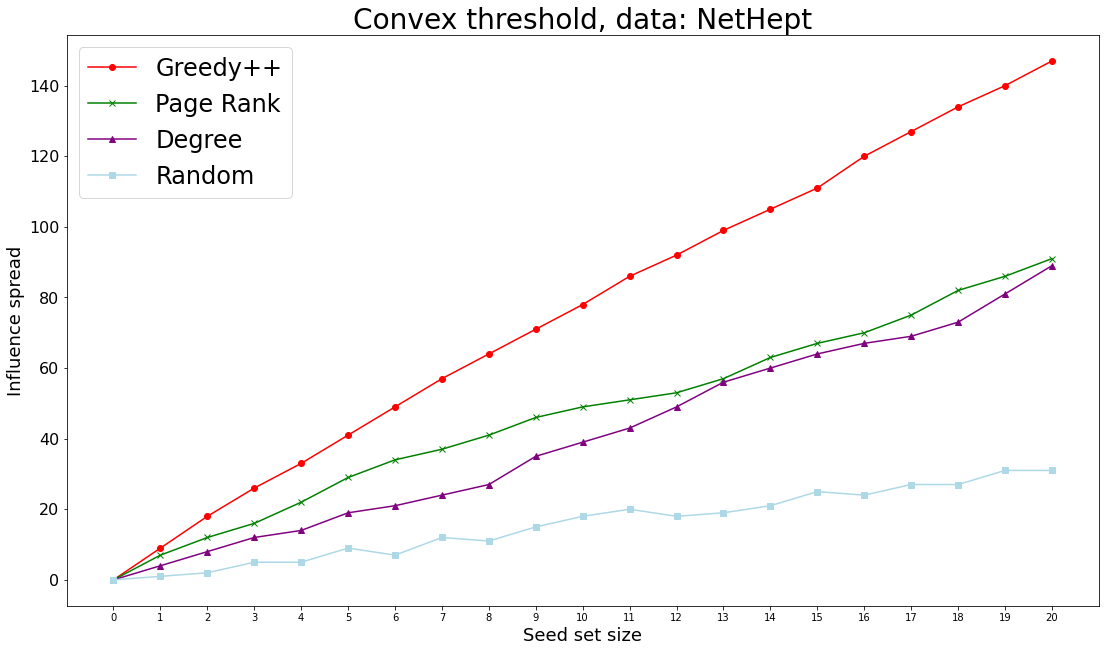

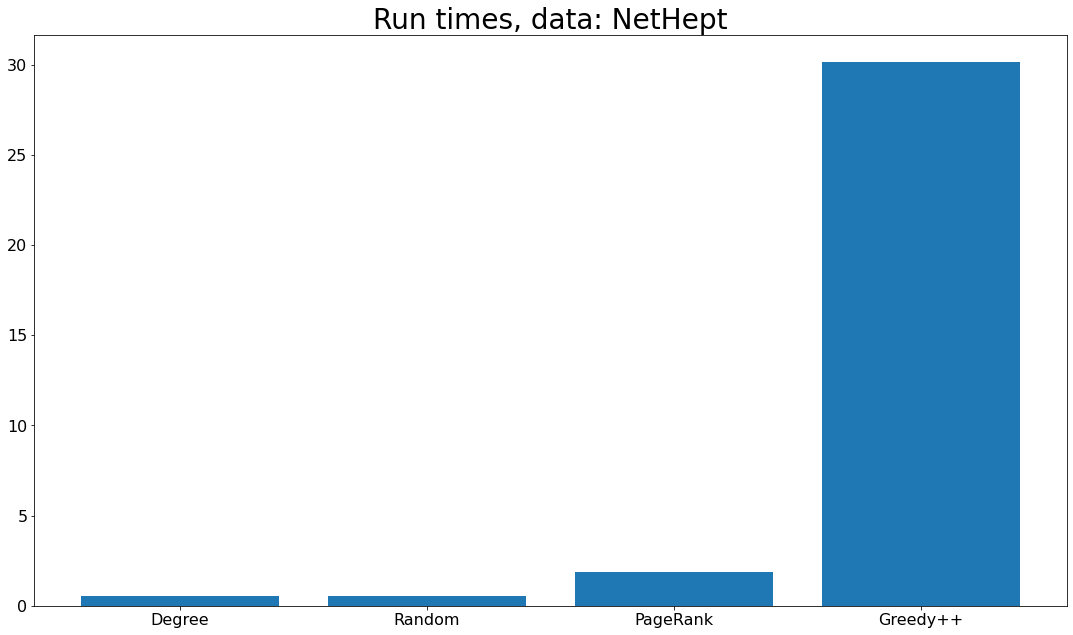

In [8]:
plot_inf("NetHept", 
         df_greedy_nethept_convex, 
         df_pagerank_nethept_convex, 
         df_degree_nethept_convex, 
         df_random_nethept_convex,
         "Convex")

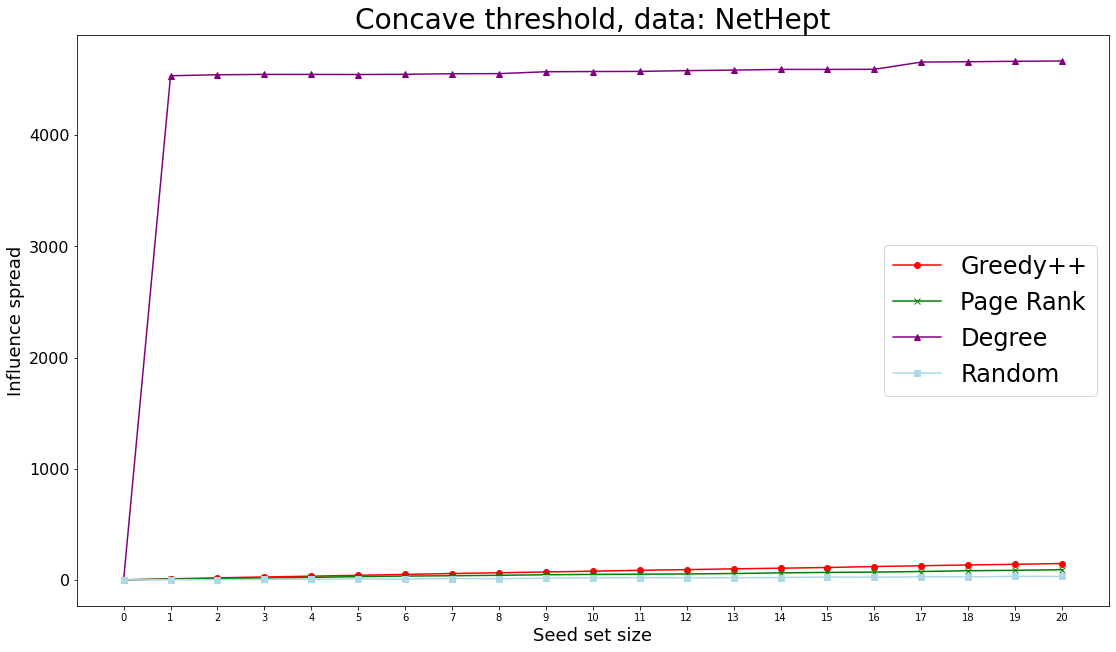

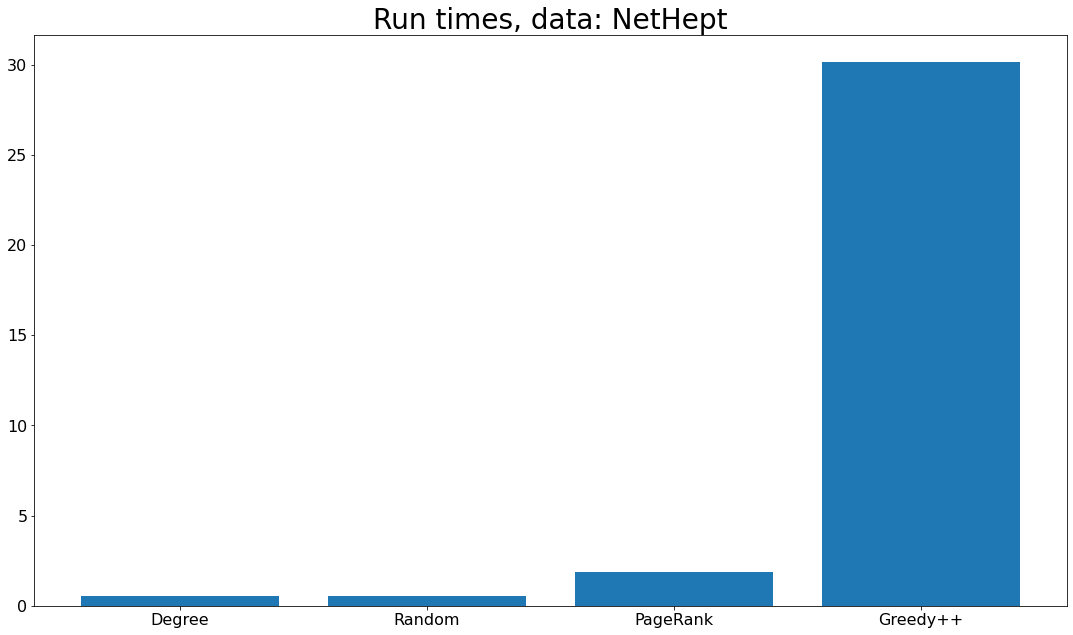

In [10]:
plot_inf("NetHept", 
         df_greedy_nethept_convex, 
         df_pagerank_nethept_convex, 
         df_degree_nethept_concave, 
         df_random_nethept_convex,
         "Concave")

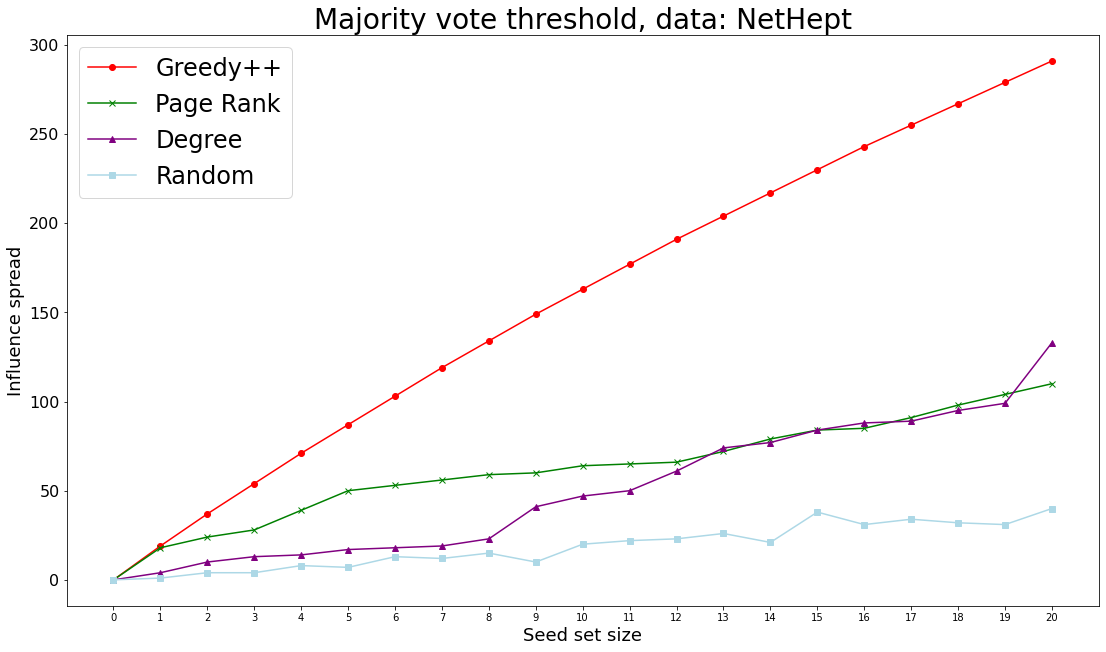

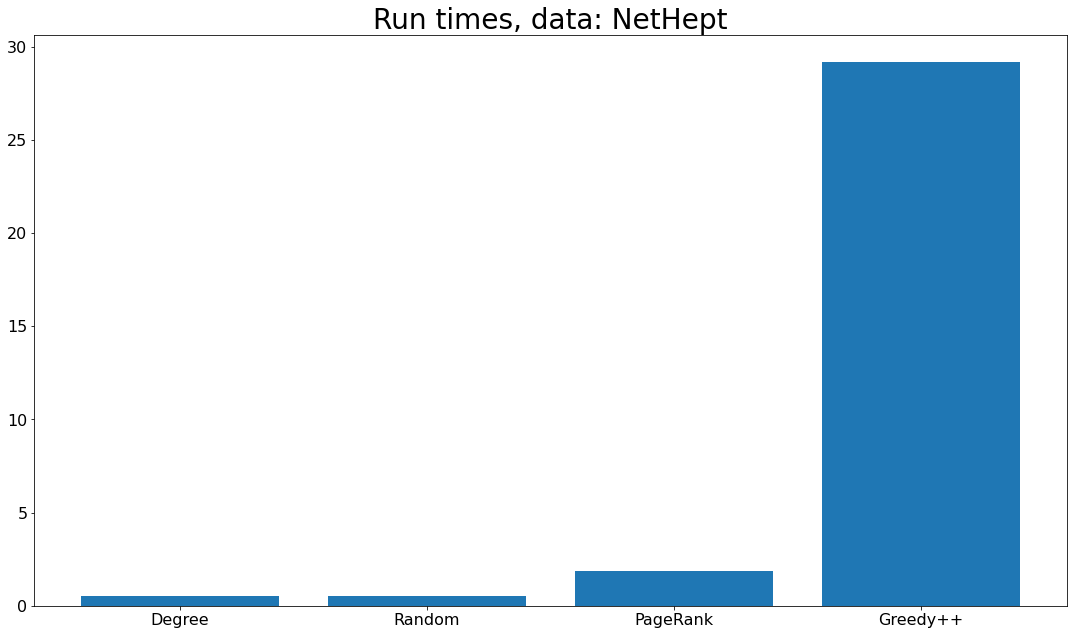

In [18]:
plot_inf("NetHept", 
         df_greedy_nethept_majority, 
         df_pagerank_nethept_majority, 
         df_degree_nethept_majority, 
         df_random_nethept_majority,
         "Majority vote")

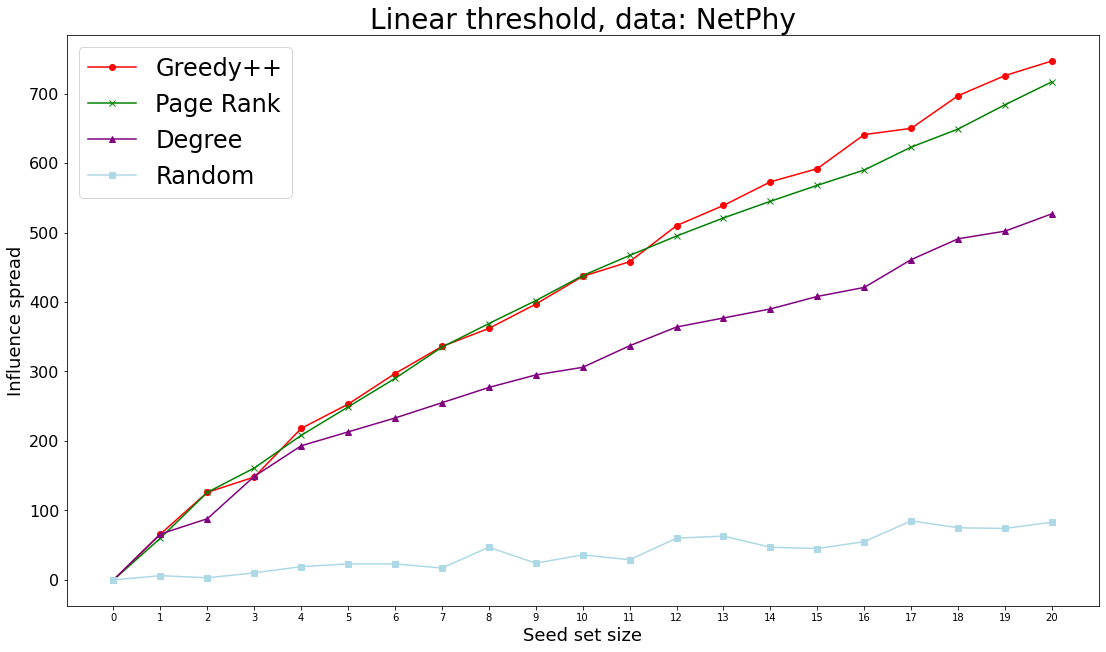

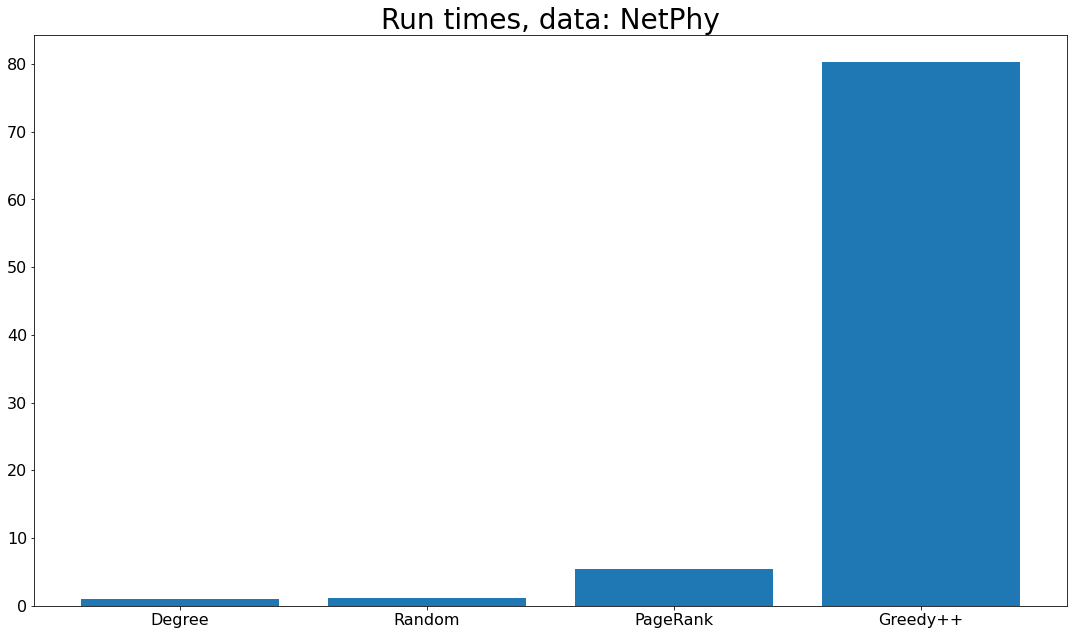

In [61]:
plot_inf("NetPhy", df_greedy_netphy, df_pagerank_netphy, df_degree_netphy, df_random_netphy,
         "Linear")

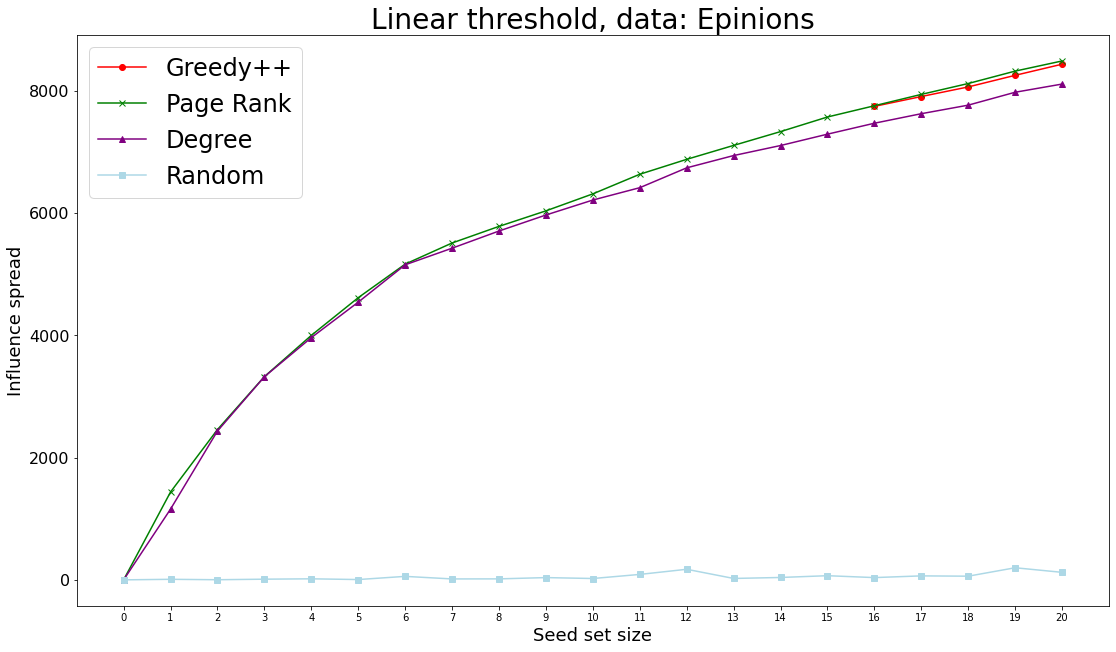

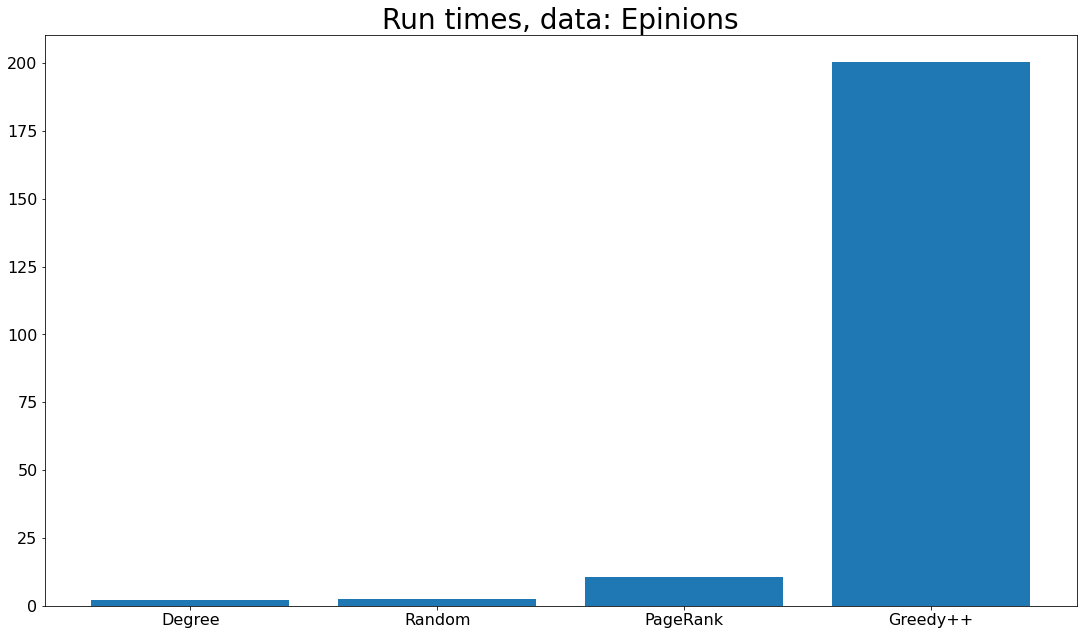

In [132]:
plot_inf("Epinions", df_greedy_epinions, 
         df_pagerank_epinions, df_degree_epinions, df_random_epinions, "Linear")